In [9]:
# Installing the package
install.packages("data.table")
install.packages("dplyr")
install.packages("vcd")
install.packages("ggplot2")
# for classification & regression training
install.packages("e1071") 
install.packages("caTools") 
install.packages("caret")

# Loading packages
library(tidyverse)
#library(tidyr)
library(corrplot)
library(data.table)
library(dplyr)
library(vcd)
library(ggplot2)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(modelr)
# for classification & regression training
library(e1071) 
library(caTools) 
library(caret) 

library(car)
library(tidymodels)
library(glmnet)
library(leaps)
library(faraway)
library(mltools)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib:
  cannot open URL 'https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib/PACKAGES'”
Warning message:
“package ‘data.table’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib:
  cannot open URL 'https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib/PACKAGES'”
Warning message:
“package ‘dplyr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas a

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


### C.S version:

## **Introduction** - Duncan

**Background Information**:

The topic we are looking at is focused around heart disease. Understanding heart disease and its causes is vital as it remains a leading cause of death globally, impacting millions of lives annually. Identifying key risk factors, such as lifestyle choices, genetic predispositions, and physiological markers, enables early intervention and the development of targeted prevention strategies, ultimately reducing mortality and improving quality of life.

The dataset is related to heart disease prediction and contains data collected from multiple sources (Cleveland, Hungary, Switzerland, and Long Beach V). This dataset dates from 1988 and consists of heart disease data collected from multiple hospitals across different regions. It includes 14 variables commonly used in heart disease research, with 1025 observations. The primary goal of this dataset is to predict the presence of heart disease based on various medical attributes. The "target" variable indicates the presence (1) or absence (0) of heart disease.

**Questions for Investigation**:

1. Does a higher chest pain type or a lower maximum heart rate significantly increase the risk of heart disease?
2. Which of the 13 predictor variables in the dataset are strongly correlated to heart disease, and does this indicate age and cholesterol influence the likelihood of heart disease?
   
**Contextualization**:

EXISTING RESEARCH

## **Methods and Results**

### **Exploratory Data Analysis (EDA)**

- Demonstrate that the dataset can be read into R.
- Clean and wrangle your data into a tidy format.
- Plot the relevant raw data, tailoring your plot to address your question.
- Make sure to explore the association of the explanatory variables with the response.
- Any summary tables that are relevant to your analysis.
Be sure not to print output that takes up a lot of screen space.

In [ ]:
# Importing dataset
heart_disease_data <- read.csv("heart.csv")
head(heart_disease_data, 5)

In [ ]:
# Taking a look at heart_disease_data dataframe info
df_info <- str(heart_disease_data)

In [ ]:
# Search for NAs in dataset
num_NAs <- sum(is.na(heart_disease_data))
num_NAs

In [ ]:
# Summary of heart_disease_data, including quantitative information on each variable
summary(heart_disease_data)

In [ ]:
# Converting dataframe to tibble
heart_disease_tibble <- as_tibble(heart_disease_data)
head(heart_disease_tibble, 5)

| Description                     | Column Name | Type      | Mean  | High | Low |
|----------------------------------|-------------|-----------|-------|------|-----|
| Age of the patient               | age         | Continuous| 54.43 | 77   | 29  |
| Gender (1 = Male, 0 = Female)    | sex         | Binary    | 0.6956| N/A  | N/A |
| Chest pain type                  | cp          | Categorical| 0.9424| N/A  | N/A |
| Resting blood pressure (mm Hg)   | trestbps    | Continuous| 131.6 | 200  | 94  |
| Serum cholesterol (mg/dL)        | chol        | Continuous| 246   | 564  | 126 |
| Fasting blood sugar > 120 mg/dL  | fbs         | Binary    | 0.1493| N/A  | N/A |
| Resting ECG results              | restecg     | Categorical| 0.5298| N/A  | N/A |
| Maximum heart rate achieved      | thalach     | Continuous| 149.1 | 202  | 71  |
| Exercise induced angina (1 = Yes, 0 = No)| exang| Binary    | 0.3366| N/A  | N/A |
| ST depression induced by exercise| oldpeak     | Continuous| 1.072 | 6.2  | 0   |
| Slope of peak exercise ST segment| slope       | Categorical| 1.385 | N/A  | N/A |
| Number of major vessels          | ca          | Categorical| 0.7541| 4    | 0   |
| Thalassemia type                 | thal        | Categorical| 2.324 | N/A  | N/A |
| Presence of heart disease (1 = Yes, 0 = No)| target| Binary | 0.5132| N/A  | N/A |


Variable Type Overview:
- Continuous variables: Age, resting blood pressure, serum cholesterol, maximum heart rate, ST depression
- Categorical variables: Sex, chest pain type, resting ECG results, slope, number of vessels, thalassemia
- Binary variables: Fasting blood sugar, exercise-induced angina, presence of heart disease (target)

Now that the data is clean and wrangled into a tidy format, a correlation matrix visualization will be produced to find the strength of correlation between all continuous exploratory variables in heart_disease_data. This heatmap will be helpful to hypothesize which variables may be problematic and inapplicable to creating a model for inference, and whether or not age and cholesterol have high correlations with any variables in the dataset.

**PLOTS (Duncans kinda suck)**

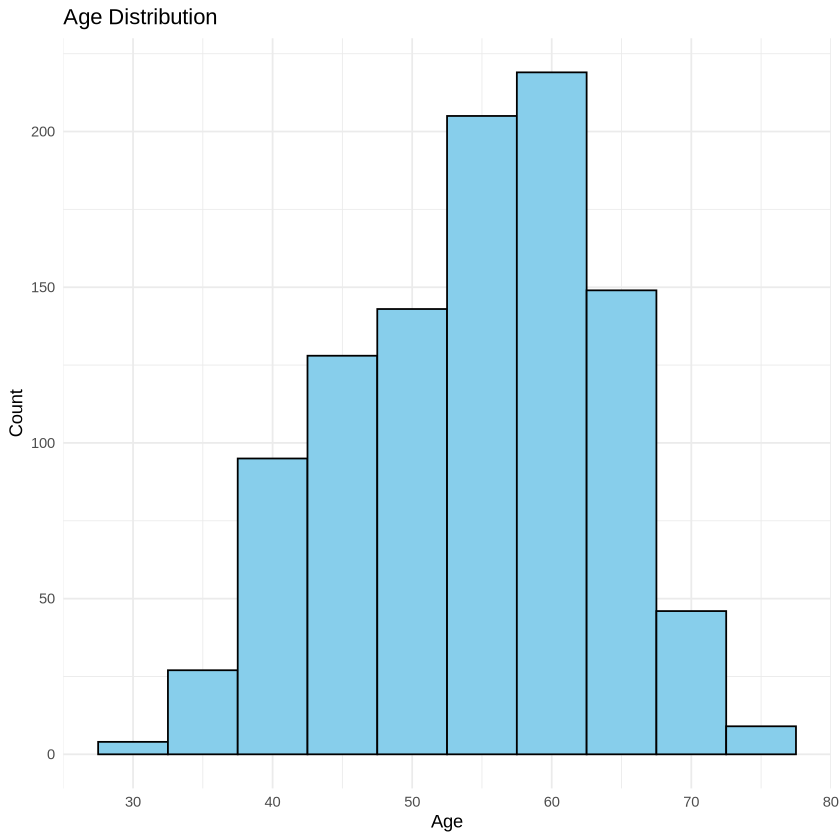

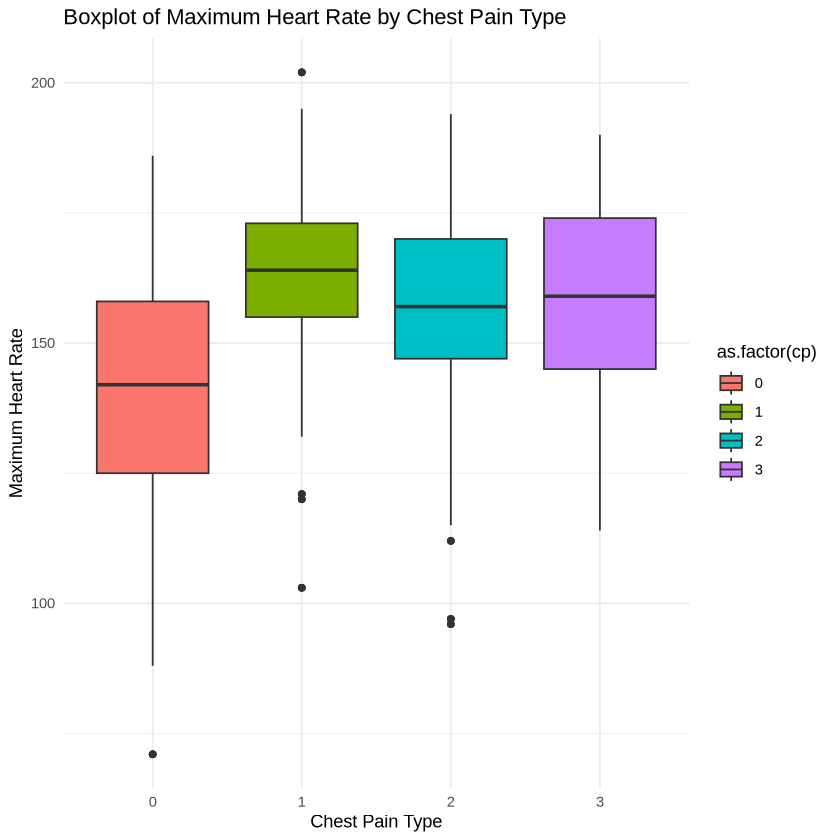

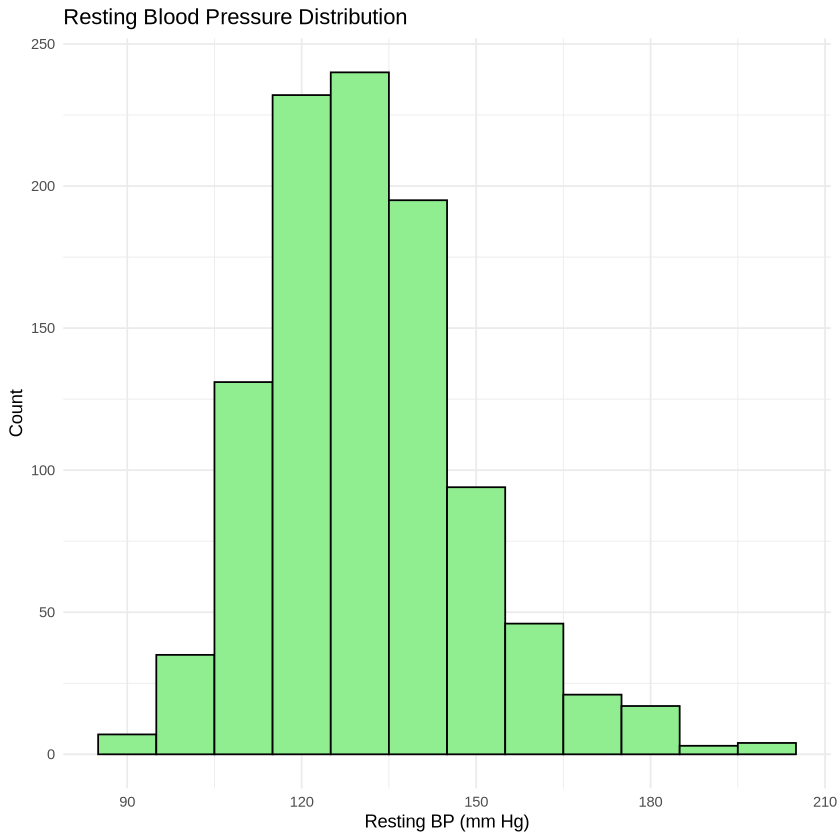

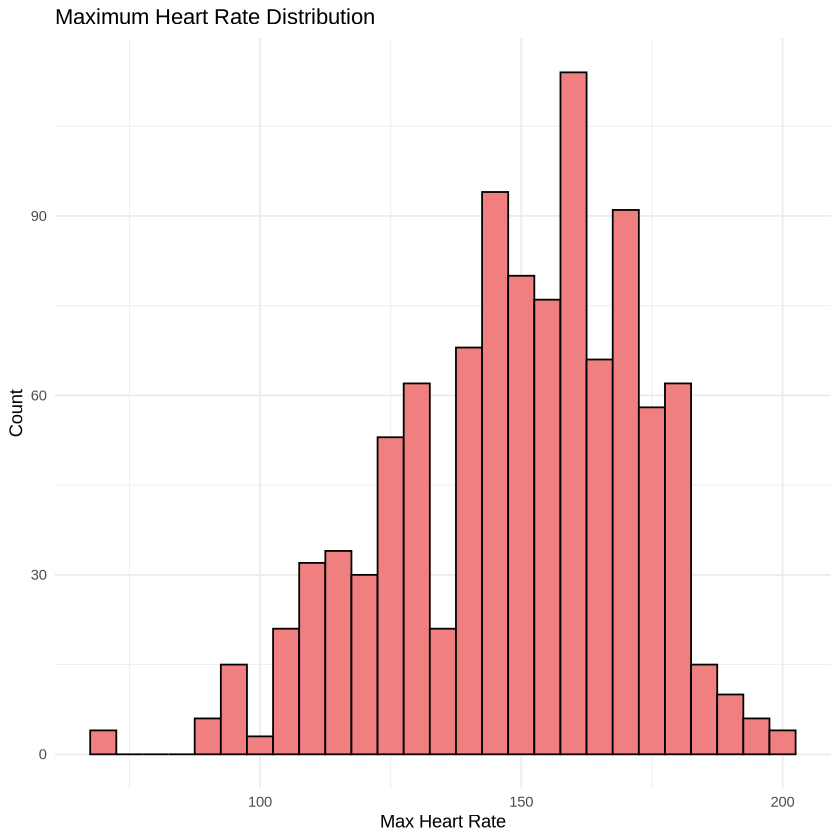

In [13]:
# Histogram for age
ggplot(heart_disease_data, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = 'skyblue', color = 'black') +
  labs(title = "Age Distribution", x = "Age", y = "Count") +
  theme_minimal()

# Boxplot for chest pain
ggplot(heart_disease_data, aes(x = as.factor(cp), y = thalach, fill = as.factor(cp))) +
  geom_boxplot() +
  labs(title = "Boxplot of Maximum Heart Rate by Chest Pain Type", 
       x = "Chest Pain Type", 
       y = "Maximum Heart Rate") +
  theme_minimal()

# Histogram for resting blood pressure
ggplot(heart_disease_data, aes(x = trestbps)) +
  geom_histogram(binwidth = 10, fill = 'lightgreen', color = 'black') +
  labs(title = "Resting Blood Pressure Distribution", x = "Resting BP (mm Hg)", y = "Count") +
  theme_minimal()

# Histogram for maximum heart rate achieved
ggplot(heart_disease_data, aes(x = thalach)) +
  geom_histogram(binwidth = 5, fill = 'lightcoral', color = 'black') +
  labs(title = "Maximum Heart Rate Distribution", x = "Max Heart Rate", y = "Count") +
  theme_minimal()

**Age Distribution (Histogram):**
- Helps visualize the distribution of ages in the dataset.
- Relevant for exploring the correlation between age and heart disease, as heart disease risk increases with age.

**Boxplot of Maximum Heart Rate by Chest Pain Type:**
- Illustrates the variation in maximum heart rate across different chest pain types.
- Useful for identifying how different chest pain types are associated with heart function and heart disease risk.

**Resting Blood Pressure Distribution (Histogram):**
- Shows the spread of resting blood pressure levels across the dataset.
- Important for understanding how high or low blood pressure relates to heart disease likelihood.

**Maximum Heart Rate Distribution (Histogram):**
- Provides an overview of the maximum heart rate values achieved by patients.
- Can reveal whether lower heart rates under stress testing are associated with heart disease presence, a critical factor in cardiovascular health.


These plots are relevant because they help in understanding the relationships between potential predictors (age, chest pain type, resting blood pressure, heart rate) and heart disease. Together, they allow for a thorough exploration of the data, guiding both prediction and inference tasks.

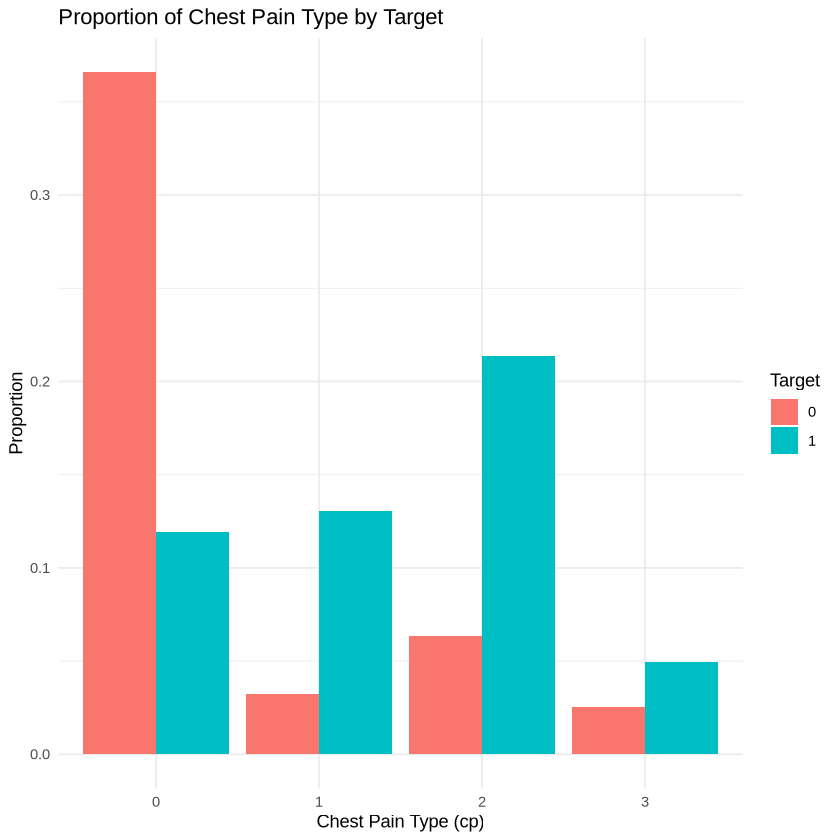

In [15]:
# Bar Plot comparing chest pain type to target
# Calculate proportions for chest pain type (cp) by target
test <- heart_disease_data %>%
  group_by(cp) %>%
  mutate(total_in_cp = n()) %>%
  group_by(cp, target) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(proportion = count / sum(count))

# Create the bar plot using proportions
ggplot(test, aes(x = as.factor(cp), y = proportion, fill = as.factor(target))) +
  geom_col(position = "dodge") +
  labs(
    title = "Proportion of Chest Pain Type by Target",
    x = "Chest Pain Type (cp)",
    y = "Proportion",
    fill = "Target"
  ) +
  theme_minimal()

Within each chest pain type, the proportion of each target category is calculated by dividing the count of each target category by the total count for that chest pain type.

This plot is also useful as it indicates the relationship between the target and the kinds of chest pain experienced. Chest pain of types 2 and 3 appear more associated with individuals that do suffer from heart disease, potentially indicating a higher likelihood of the condition, while chest pain type 0 is much more common in those without heart disease.

### Finding Correlation Coefficients via Heatmap 

In [11]:
# Selecting only for continuous variables, excluding categorical variables
selected_vars <- c("age", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal")
selected_df <- heart_disease_data[, selected_vars]

# Creating the correlation matrix
correlation_matrix <- cor(selected_df, use = "pairwise.complete.obs")

# Melting the matrix
melted_corr <- melt(correlation_matrix) 

# Create the heatmap via ggplot()
 heatmap <- ggplot(data = melted_corr, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), 
                       name="Correlation") +
  theme_minimal() +
  labs(title = "Correlation Heatmap for Heart Disease Dataset Variables") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

heatmap

ERROR: Error in melt(correlation_matrix): could not find function "melt"


Of the continuous variables, the most strongly correlated are the following:
- _oldpeak_ and _slope_ (strongest observed correlation)
- _thalach_ and _age_
- _exang_ and _cp_
- _exang_ and _thalach_
- _oldpeak_ and _thalach_

_age_ has a strong negative correlation with _thalach_, indicating these variables strongly influence each other's estimated coefficient in the regression model. _Age_ and _chol_ have a low positive correlation with _r_ = 0 - 0.4, indicating these variables weakly influence each other's estimated coefficients in a binary logistic regression model. Very few overpowering, influential exploratory continuous variables exist in this dataset.

### **Methods: Plan**

**Method to address the question of interest**: 

- Using LASSO Regression to fit a Binary logistic regression for inferential modelling

**Why this method is appropriate**: 

- effective for binary classification, and finding the true relation between the continuous numeric input variables and the binary heart disease variable _target_
- binary logistic regression is an effective regression model for probability of each value in dichotomous dependent variables, such as the dummy response variable _target_ ( equals 1 or 0) in the heart disease dataset. This is improved by selection and regularization via LASSO
- LASSO shrinkage helps to reduce overfitting
- LASSO feature selection picks input variables with minimal multicollinearity to include only significant variables in a model

**Required Assumptions to apply Binary Logistic Regression**:
- The target variable is binary with two possible outcomes (in this dataset: 0 = no heart disease and 1=has heart disease)
  
- Independent observations: no correlated data points exist, each observation was independently collected, and had no influence on each other
  
- Moderate or very low multicollinearity: explanatory variables should be weakly or not at all correlated to prevent issues with lower precision, such as estimated coefficients with large confidence intervals

**Potential limitations or weaknesses of the method selected**:

Binary logistic Regression assumes a linear relationship between exploratory variables and the log odds of the response variable, which is very uncommon in real-world scenarios. This includes health, where various factors such as a patient's specific medical history and correlated variables also affect the observation. A pre-requisite of using this method is moderate-low multicollinearity between independent variables, which is unlikely since many physiological variables are often correlated (ex. age and blood pressure). This interpretation may simplify our view of the dataset, although many real-world correlated input variables can influence the calculated magnitude of an individual independent variable's effect on the likelihood of heart disease. 


Issues with using LASSO regression:
- Biased estimators: the sampling distributions of LASSO estimators are not centered at the true value of the parameter.
- "double dipping": The same data cannot be used to select variables of the model and also conduct inference, however this post-inference issue occurs when fitting an LS regression after LASSO


**What can be done to handle this**:
- To handle highly-correlated variables: Lasso ridge will be used for selecting variables by finding the lowest MSE values, and dropping the variables that may be problematically highly correlated (high MSE values)
- To handle biased estimators: post-lasso technique can be applied by fitting regular least squares onto all exploratory variables LASSO selects, although this does not apply to a logistic model with a binary non-continuous response variable, so other models may be explored to account for this weakness
- To handle "double dipping": we split the data into two parts, where one is for model selection, the other for inference

### Implementation of a Proposed Model (Computational code and output)

#### Applying Lasso Regression

In [ ]:
#Splitting the dataset to handle the "double-dipping" issue, one portion is for model selection, the other is for inference
data_split <- initial_split(heart_disease_data, prop = 0.6, strata = target)
data_selection <- training(data_split)
data_inference <- testing(data_split)

In [ ]:
#Running Lasso on data_selection tibble to find value lambda that provides lowest Cross-validation MSE
set.seed(20211118)

lasso_model <-
    cv.glmnet(data_selection %>% select(-target) %>% as.matrix(), 
              data_selection$target, 
              alpha=1)

In [ ]:
# Extracting coefficients of the best lasso model (smallest MSE)
set.seed(20211118)


beta_lasso <-
    coef(lasso_model, s = lasso_model$lambda.min)

**Observation**

During selection of best variables for the lasso model, fbs (fasting blood sugar) was cancelled: this indicates it has no statistically significant correlation to target (p-value > 0.05). Otherwise, since LASSO has kept 8 variables, there is likely minimal multicollinearity between the exploratory input variables of the dataset.

In [ ]:
# Finding the covariates lasso selected
lasso_picked_covariates <-
    as_tibble(
        as.matrix(beta_lasso),
        rownames='covariate') %>%
        filter(covariate != '(Intercept)' & abs(s1) !=0) %>% 
        pull(covariate)

In [ ]:
# Taking a look at vif (variance inflation factor) of variables selected by lasso
lasso_variables_vif <- vif(lm(target ~ . , data = data_selection %>% 
        select(contains(lasso_picked_covariates), target)))

print(lasso_variables_vif)

**Observation**

All selected exploratory variables have VIF values slightly above 1 (_oldpeak+ being the greatest at MSE=1.66), and large VIF values >5 or > 10 are considered indicators of higher multicollinearity. This suggests low multicollinearity in the dataset. Correlation between exploratory variables is only a minor issue in this dataset, which is consistent with _Correlation Heatmap for Heart Disease Dataset Variables_, where very few strongly correlated variable pairs were observed.

In [ ]:
# producing the inference model visualization based on the covariates picked by lasso
inference_model <- 
    glm( target ~ .,
        data = data_inference %>% 
                   select(contains(lasso_picked_covariates), target),
       family=binomial)


summary(inference_model) 

### **Interpretation of Results**

The inference model produced indicates the following unexpected result: _age_'s p-value = 0.609 and _chol_'s p-value = 0.39, both of which are > 0.05 (significance level) by a large margin. Concerning the question of interest, based on the final _inference model_ produced by lasso regression on the binary logistic model, these variables **do not** have a statistically significant effect on the likelihood of heart disease. The variables _sex_, _cp_, _trestbps_, _exang_, _oldpeak_, _slope_, _ca_, and _thal_ have p-values < 0.05, where _sex_,_cp_,_exang_, and _ca_ have especially strongly statistically significant correlations to the likelihood of heart disease, suggesting these are the best predictor variables for creating a logistic model to determine the probability an individual has heart disease.
- Potential issue: Residual deviance of 268 on 398 degrees of freedom indicates that the model does not explain some variance in the data, so this model possibly is not the best fit for inference, although AIC=294.35 may be used for comparison to explore other methods (with potentially lower AICs) to produce a model that more strongly fits the data

## **Discussion**

## **References**

https://argoshare.is.ed.ac.uk/healthyr_book/model-assumptions.html

https://www.ibm.com/topics/lasso-regression

https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/